# Eigenvalues and Eigenvectors

행렬 $A$, 벡터 $v$, 스칼라 $\lambda$가 같은 관계를 만족할 때
$$ 
A v = \lambda v
$$
$v$를 $A$에 대한 고유벡터, $\lambda$를 $A$에 대한 $v$에 대응하는 고유값이라고 부른다.
물리학에서는 대개 대칭행렬(혹은 복소수를 포함한다면 에르미트 행렬)을 다루기 때문에 여기에서도 특별한 언급이 없다면 모든 행렬은 대칭 행렬로 간주한다.
대칭행렬은 전치행렬(transpose matrix)이 자기자신과 같은 행렬을 말한다.
$$ A^T = A, \quad  A_{ij} = A_{ji}.$$
다음의 예시를 통해 고유값과 고유벡터의 의미를 살펴보자.

### 파울리 행렬
다음처럼 주어지는 두 행렬을 고려하자.

$\begin{align}
\sigma_z = \begin{pmatrix}  1 & 0 \\ 0 & -1 \end{pmatrix}, \quad  
\sigma_x = \begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix}.
\end{align}$  

우선 $\sigma_z$를 살펴보자. 이 행렬의 아이겐벡터는 
$ v_1 = \begin{pmatrix}  1 \\ 0 \end{pmatrix}, \  v_2 = \begin{pmatrix}  0 \\ 1 \end{pmatrix}$이며 아이겐밸류는 $1, -1$이다. 이 행렬이 $x \rightarrow x$, $y \rightarrow -y$로의 변환이므로 이 결과는 자명하다.

반면 $\sigma_x$은 $x \rightarrow y$, $y \rightarrow x$로의 변환이며 아이겐벡터는 
$ v_1 = \begin{pmatrix}  1 \\ 1 \end{pmatrix}, \  v_2 = \begin{pmatrix}  1 \\ -1 \end{pmatrix}$이며 아이겐밸류는 $1, -1$이다.  

두 행렬을 그래프로 살펴보자.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sz=np.array([[1,0],[0,-1]])
ez=np.linalg.eig(sz) # 하나의 세로열(column)이 하나의 아이겐벡터이다.

sx=np.array([[0,1],[1,0]])
ex=np.linalg.eig(sx) # 하나의 세로열(column)이 하나의 아이겐벡터이다.

ez,ex

((array([ 1., -1.]), array([[1., 0.],
         [0., 1.]])), (array([ 1., -1.]), array([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]])))

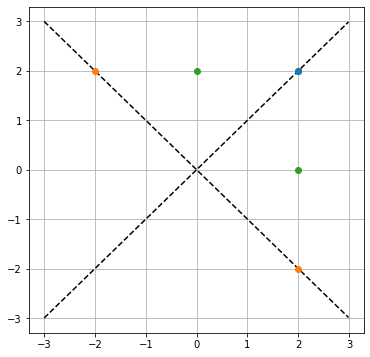

In [44]:
x=np.arange(-3,3,0.01)
v1=np.array(x)
v2=np.array(-1*x)

plt.figure(figsize=(6,6))
plt.grid()
plt.plot(x,v1,'k--',x,v2,'k--')
plt.plot([2,2],[2,2],'o')
plt.plot([2,-2],[-2,2],'o')
plt.plot([2,0],[0,2],'o');

$\sigma_x$의 아이겐밸류 방정식은 다음을 만족한다.  
$ 
\begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix}  1  \\  1 \end{pmatrix} = (1) \begin{pmatrix}  1  \\  1 \end{pmatrix}
$

$
\begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix} 
1  \\  -1 \end{pmatrix} = (-1) \begin{pmatrix}  1  \\  -1 \end{pmatrix} 
$

다음처럼 분해하면 선형변환을 간단히 계산할 수 있다. 예를 들면

$ 
\begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix}  2  \\  0 \end{pmatrix} 
= \begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix} 
 (1)\begin{pmatrix}  1  \\  1 \end{pmatrix}
+ (1) \begin{pmatrix}  1  \\  -1 \end{pmatrix} 
= \sigma_x [ v_1 + v_2] = v_1 + (-1)v_2 =\begin{pmatrix}  0 \\ 2 \end{pmatrix}   
$

# Matrix Diagonalization

위의 고유값 문제를 행렬의 대각화라는 관점에서 살펴보자.
위의 $s_x$ 행렬을 다음처럼 써보자. 
$$ s_x V = V D $$
$V$는 $s_x$행렬의 아이겐벡터로 구성된 직교행렬(orthogonal matrix)이며 $D$는 대각성분이 아이겐밸류인 대각행렬이다.
따라서, 

$
\begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix}  1 & 1 \\ -1 & 1  \end{pmatrix} 
= \begin{pmatrix}  1 & 1 \\ -1 & 1  \end{pmatrix} 
\begin{pmatrix}  -1 & 0 \\ 0 & 1 \end{pmatrix}.
$

즉 위의 식은 고유값 방정식을 행렬로 표현한 것이다. 고유벡터는 직교하므로 $V$행렬은 직교행렬이며 즉 다음을 만족한다.
$$ V^{T}=V^{-1} $$

식 $ s_x V = V D $으로 돌아와서 직교행렬의 성질을 이용해서 정리하면
$$ s_x = VD V^{-1} = VDV^{T}.$$
혹은 반대로 $s_x$의 아이겐밸류를 대각성분으로 하는 대각행렬은 다음과 같으며 이를 통해 행렬을 대각화할 수 있다.
$$ D = V^{T} s_x V.$$


$V$와 $D$의 의미를 살펴보자. 우선 축을 돌리는 회전변환을 생각해보자.
$$ R=\begin{pmatrix} \cos \theta & \sin \theta  \\ -\sin \theta  & \cos \theta  \end{pmatrix}. $$
$V$행렬을 $R$과 비교하면 
$$ V= \sqrt{2} \begin{pmatrix} 1/\sqrt{2} & 1/\sqrt{2}  \\ -1/\sqrt{2}  & 1/\sqrt{2}  \end{pmatrix}
= \sqrt{2} \begin{pmatrix} \cos \pi/4 & \sin \pi/4  \\ -\sin \pi/4  & \cos \pi/4  \end{pmatrix} $$
$$
V^T =V^{-1}= \sqrt{2} \begin{pmatrix} 1/\sqrt{2} & -1/\sqrt{2}  \\ 1/\sqrt{2}  & 1/\sqrt{2}  \end{pmatrix}
= \sqrt{2} \begin{pmatrix} \cos \pi/4 & - \sin \pi/4  \\ \sin \pi/4  & \cos \pi/4  \end{pmatrix}.
$$
$V$는 x-y축을 45도만큼 돌리는 변환이고 $V^{T}$는 축을 -45도 돌리는 변환이다. 
위의 그래프와 비교해보면 $s_x = VD V^{-1}$이므로 $s_x$는 축을 -45도 돌리고 돌린 축을 기초로 $x \rightarrow -x$, $y \rightarrow y$로 바꾸는 변환을 한 후 다시 축을 45도 돌리는 변환이다. 즉 $s_x$와 $s_z$는 다른 기저에서 같은 변환을 하는 행렬임을 알 수 있다. 그런 의미에서 이러한 변환($A \rightarrow U^{-1} B U$)을 닮음변환(similarity transformation)이라고 부르며 이런 변환이 가능할 때 $A$와 $B$를 닮았다(similar)고 한다. 